# Building a Receipt Understanding Model

Receipts are a common way to store information about the items purchased. They are used by customers to keep track of their expenses and by businesses to keep track of their sales. Many customers find it difficult to keep track of their expenses because they have to manually enter the information from the receipts into a spreadsheet. This is a time-consuming process and can lead to errors.

In this notebook, we will build a receipt understanding model that can automatically extract information from receipts. The model will be able to extract the following information from a receipt:
- Date
- Company
- Address
- Total Price

The model will also be able to extract the exact location of each item on the receipt.

## How are we going to do this?

Understanding receipts presents a significant challenge due to the unstructured nature of the data. Receipts often contain a mix of textual and visual information, making it difficult for model to extract useful information. Information about what a certain item is depends not only on the text but also on its location on the receipt, the structure of the receipt, and the context of the other items on the receipt. This presents a signficant challenge because a successful model will need to incorperate all of these factors to accurately extract information from a receipt.

Although this problem sounds challenging, certain types of models have been built to handle this problem specifically. Theses models are called document understanding models. These models are built to encode both the text and the layout of a document and use this information to extract useful information. The transform documents to a hidden state that can later be used to extract information. We will discussed the hidden state in more detail later.

Building a document understanding model requires a large amount of data and computational resources. However, we can use pre-trained models to build a document understanding model. Pre-trained models are models that have been trained on a large amount of data and can be fine-tuned on a smaller dataset to perform a specific task. These models have been shared by the research community and we can utilize them to build our own document understanding model. This will save us time, computational resources, and will help keep our environmental impact low.

In this notebook, we will be using Microsoft's LayoutLMv3 model to understand the documents. LayoutLMv3 is a state-of-the-art document understanding model that is built to understand both the text and the layout of a document. 


### Understanding the LayoutLMv3 Model

![LayoutLMv3 Architecture](https://raw.githubusercontent.com/ibrahimhabibeg/receipt-understanding/refs/heads/main/images/layoutlmv3_architecture.png)

LayoutLMv3 is a state-of-the-art document understanding model that is built to understand both the text and the layout of a document released by Microsoft in the paper [LayoutLMv3: Pre-training Multimodal Vision-Language Models for Document Understanding](https://arxiv.org/abs/2204.08387). It simplifies LayoutLMv3 by using patch embeddings instead of leveraging a CNN backbone.

The abstract of the paper is as follows:

*Self-supervised pre-training techniques have achieved remarkable progress in Document AI. Most multimodal pre-trained models use a masked language modeling objective to learn bidirectional representations on the text modality, but they differ in pre-training objectives for the image modality. This discrepancy adds difficulty to multimodal representation learning. In this paper, we propose LayoutLMv3 to pre-train multimodal Transformers for Document AI with unified text and image masking. Additionally, LayoutLMv3 is pre-trained with a word-patch alignment objective to learn cross-modal alignment by predicting whether the corresponding image patch of a text word is masked. The simple unified architecture and training objectives make LayoutLMv3 a general-purpose pre-trained model for both text-centric and image-centric Document AI tasks. Experimental results show that LayoutLMv3 achieves state-of-the-art performance not only in text-centric tasks, including form understanding, receipt understanding, and document visual question answering, but also in image-centric tasks such as document image classification and document layout analysis.*

The LayoutLMv3 model process both the text and the layout of a document to extract useful information. Thus it requires 
- Image of the document
- Text of the document alog with their location on the document (bounding box)

### OCR

LayoutLMv3 requires the text and the location of the text on the document. We can use Optical Character Recognition (OCR) to extract the text and the location of the text on the document. OCR is a technology that converts different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. OCR technology is used to convert virtually any type of image containing written text (typed, handwritten, or printed) into machine-readable text data.

We will use tesseract OCR to extract the text and the location of the text on the document. Tesseract OCR is an open-source OCR engine that has been trained on a large amount of data and can be used to extract text from images. Tesseract will provide us with both the text and the location of the text on the document.

### Tokenization

Tesseract will provide us with the text and the location of the text on the document. However, LayoutLMv3 isn't able to directly process text and characters. It requires the text to be transformed to numerical values. This process is called tokenization. It is the process of first splitting the text based on certain rules and then converting the text to numerical values. The numerical values are then used to train the model.

LayoutLMv3 relies on byte-pair encoding (BPE) tokenization. BPE tokenization is a type of tokenization that splits the text into subwords based on the frequency of the subwords in the text. It is a popular tokenization method because it can handle out-of-vocabulary words and can be used to build a vocabulary that can be used to train the model. It has been used in many state-of-the-art models such as GPT-2, BART, and RoBERTa.

### Token Classification Head

By using OCR model and tokenization, LayoutLMv3 will now be able to preocess the receipt and extract useful information. The model emcodes this information in a hidden state. Although the hidden state contains useful information, it is not directly interpretable. We need to build a token classification head to extract useful information from the hidden state. The token classification head is a neural network that takes the hidden state as input and outputs the information that we are interested in. This head will tell us weather each token provided by the OCR model is a date, company, address, total price, or other.

When we initialize this head, it will have random weights and using it will be meaningless. We need to fine-tune the token classification head on a dataset that contains the information that we are interested in. This process will allow the token classification head to learn the relation between the hidden state and the category of the token.

We will use the SROIE dataset to fine-tune the token classification head. The SROIE dataset contains receipts along with the information that we are interested in.

## Building the Model

To fine-tune the LayoutLMv3 model, we will first need to preprocess the SROIE dataset and convert it to a format that can be used to fine-tune the model. This includes extracting the text, the location of the text on the document, and tokenizing the text. We will then fine-tune the LayoutLMv3 model on the SROIE dataset.

### Data Preprocessing

We will the dataset found [here](https://www.kaggle.com/datasets/urbikn/sroie-datasetv2). The dataset contains the images of the receipts, the text on the receipts, the location of the text on the receipts, and the useful information that we are interested in (date, company, address, total price).

To keep this notebook simple and concise, the exact steps for data preprocessing arenn't provided. They are provided in the `Preprocessing.ipynb` notebook. The notebook contains the code to preprocess the dataset and convert it to a format that can be used to fine-tune the model. In this notebook, we will use the data generated by the `Preprocessing.ipynb` notebook.

Running the `Preprocessing.ipynb` notebook will generate the following folders:
- `data/unprocessed`: Contains the unprocessed data downloaded from the dataset
- `data/train`: Contains the training data
- `data/test`: Contains the testing data

### Fine-tuning LayoutLMv3

Since the data preprocessing steps are already done, we can now fine-tune the LayoutLMv3 model on the SROIE dataset. We won't be fine-tuning the model in this notebook because it requires a large amount of computational resources. However, you can find the code to fine-tune the model in the `Finetuning.ipynb` notebook.

Running the `Finetuning.ipynb` notebook will fine-tune the LayoutLMv3 model on the SROIE dataset and save the model to the `model` folder.

We evaluated the model using the `seqeval` library. On a typical run, the model achieves f1 score of 0.9 on the test set.

## Inference

Now that the model is trained, we can show the model in action. We will create three classes to help us extract information from the receipts:
- `ReceiptReader`: This class will be use the model to extract text, bounding boxes, and predictions (labels for each text) from the receipts.
- `ReceiptLabeler`: This class uses `ReceiptReader` to display the information extracted from the receipts.
- `ReceiptInformationExtractor`: This class also uses `ReceiptReader` to create a dictionary containing the following information extracted from the receipts:
    - Date
    - Company
    - Address
    - Total Price


*Note: You need to run the `Preprocessing.ipynb` and `Finetuning.ipynb` notebooks before running this notebook.*

In [1]:
%%capture
! pip install transformers
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
import torch
from collections import Counter
from transformers import AutoModelForTokenClassification, AutoProcessor

class ReceiptReader:
  def __init__(self, path_to_model="model"):
    self.model = AutoModelForTokenClassification.from_pretrained(path_to_model)
    self.model.eval()
    self.processor = AutoProcessor.from_pretrained(path_to_model)      

  def __call__(self, image):
    encodings = self.__get_encodings(image)
    words = self.__get_words(encodings)
    bboxes = encodings.bbox[0]
    logits = self.model(**encodings).logits
    predictions = torch.argmax(logits, dim=2)
    labeled_tokens = [self.model.config.id2label[t.item()] for t in predictions[0]]
    response_dict = self.__merge_tokens(words, bboxes, labeled_tokens)
    response_dict["bboxes"] = [self.__unnormalize_bbox(bbox, image) for bbox in response_dict["bboxes"]]
    return response_dict
  
  def __get_encodings(self, image):
    return self.processor(image, return_tensors="pt")
  
  def __get_words(self, encodings):
    words = [self.processor.tokenizer.decode(input_id) for input_id in encodings.input_ids[0]]
    return words
  
  def __merge_tokens(self, words, bboxes, labels):
    new_words = []
    new_bboxes = []
    new_labels = []
    i = 0
    while i < len(words):
        token, bbox, label = words[i], bboxes[i], labels[i]
        j = i + 1
        while j < len(words) and self.__is_same_bbox(bbox, bboxes[j]):
            token += words[j]
            j += 1
        counter = Counter([labels[k] for k in range(i, j)])
        sorted_labels = sorted(counter, key=counter.get, reverse=True)
        if sorted_labels[0] == "O" and len(sorted_labels) > 1:
          label = sorted_labels[1]
        else:
          label = sorted_labels[0]
        new_words.append(token)
        new_bboxes.append(bbox)
        new_labels.append(label)
        i = j
    return {
        "words": new_words,
        "bboxes": new_bboxes,
        "labels": new_labels
    }
  
  def __is_same_bbox(self, bbox1, bbox2):
    for i in range(4):
        if abs(bbox1[i] - bbox2[i]) > 3:
            return False
    return True
  
  def __unnormalize_bbox(self, bbox, image):
    width, height = image.size
    return [bbox[0] * width / 1000, bbox[1] * height / 1000, bbox[2] * width / 1000, bbox[3] * height / 1000]

In [4]:
from PIL import ImageDraw

class ReceiptLabeler:
  def __init__(self, path_to_model="model"):
    self.receipt_reader = ReceiptReader(path_to_model)
    self.label_colors = {
        "O": "yellow",
        "B-COMPANY": "purple",
        "B-DATE": "green",
        "B-ADDRESS": "blue",
        "B-TOTAL": "red"
    }
  
  def __call__(self, image, include_others=False, include_words=False):
    receipt_data = self.receipt_reader(image)
    
    labeled_image = image.copy()
    draw = ImageDraw.Draw(labeled_image)
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if include_others or label != "O":
        draw.rectangle(bbox, outline=self.label_colors[label], width=2)
        draw.text((bbox[0], bbox[1]-10), label, fill=self.label_colors[label])
        if include_words:
          draw.text((bbox[0], bbox[3]), word, fill=self.label_colors[label])
        
    return labeled_image    

In [5]:
class ReceiptInformationExtractor:
  def __init__(self, path_to_model="model"):
    self.receipt_reader = ReceiptReader(path_to_model)
  
  def __call__(self, image):
    receipt_data = self.receipt_reader(image)
    response_dict = {
        "company": "",
        "date": "",
        "address": "",
        "total": ""
    }
    
    # Get the company having the largest bbox
    max_bbox = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-COMPANY":
        bbox_size = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
        if bbox_size > max_bbox:
          response_dict["company"] = word.strip()
          max_bbox = bbox_size
          
    # Get the address having the largest bbox
    max_bbox = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-ADDRESS":
        bbox_size = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
        if bbox_size > max_bbox:
          response_dict["address"] = word.strip()
          max_bbox = bbox_size
  
    # Get the topmost date
    min_y = float("inf")
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-DATE" and bbox[1] < min_y:
        response_dict["date"] = word.strip()
        min_y = bbox[1]

    # Get the bottommost total
    max_y = 0
    for word, bbox, label in zip(receipt_data['words'], receipt_data["bboxes"], receipt_data["labels"]):
      if label == "B-TOTAL" and bbox[3] > max_y:
        response_dict["total"] = word.strip()
        max_y = bbox[3]
        
    return response_dict
  

We can now use the `ReceiptLabeler` and `ReceiptInformationExtractor` classes to extract information from the receipts.

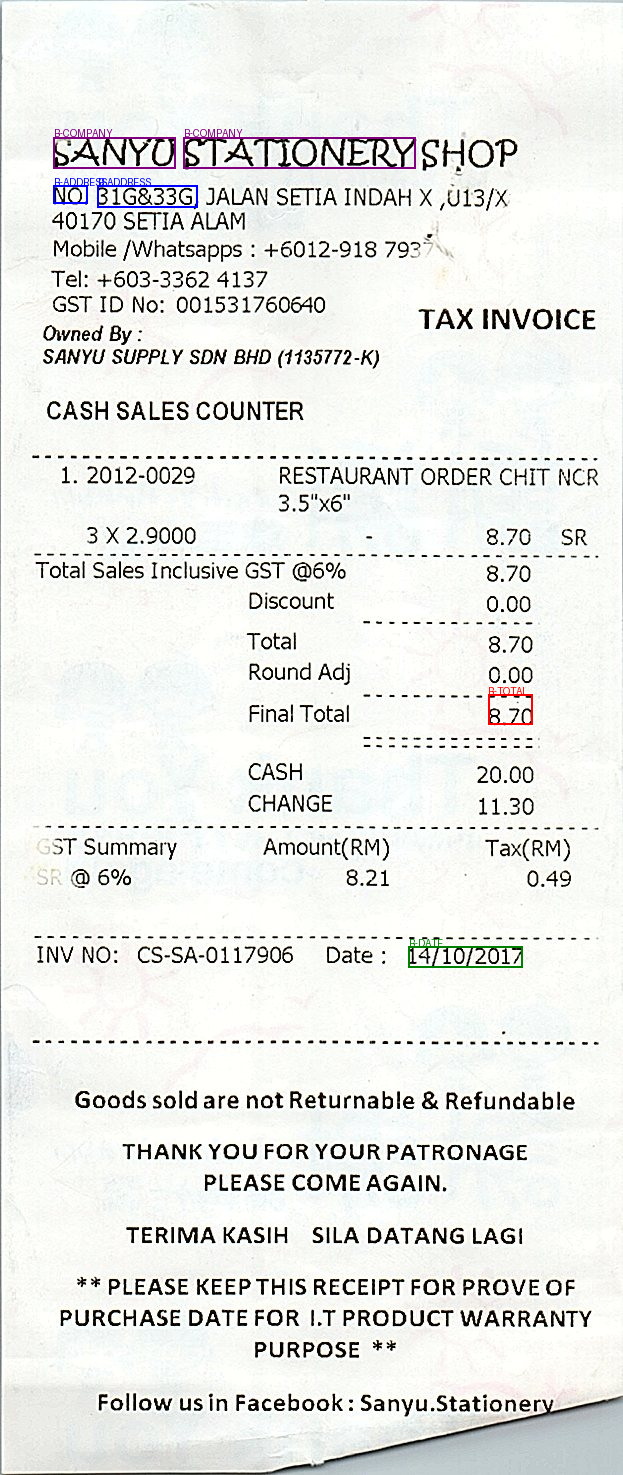

In [5]:
import PIL

image = PIL.Image.open("data/unprocessed/SROIE2019/test/img/X51007339122.jpg").convert("RGB")

receipt_labeler = ReceiptLabeler()
labeled_image = receipt_labeler(image, include_others=False, include_words=False)
labeled_image

In [6]:
receipt_info_extractor = ReceiptInformationExtractor()
receipt_info_extractor(image)

{'company': 'STATIONERY',
 'date': '14/10/2017',
 'address': '31G&33G,',
 'total': '8.70'}

## Conclusion

In this notebook, we explained how to build a receipt understanding model using LayoutLMv3. We used the SROIE dataset to fine-tune the model and extract information from the receipts. We also showed how to use the model to extract information from the receipts. This model can be used to extract information from receipts and help customers keep track of their expenses.